In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

Using TensorFlow backend.


In [2]:
#Load the training data from csv file
train_data = pd.read_csv('train.csv', header=0)

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Explor the data:<br>
-Check number of rows and columns <br>
-Data types of features<br>
-Statistics of the features <br>
-Drop un-needed features<br>
-Encode Categorical features <br>
-Process missing values<br>
-Feature engineering if required (add new features if needed)<br>
-Scale features if needed <br>
-Create the model <br>
-Train the model <br>
-Score the model <br>
-Improve the model <br>

In [5]:
#Check number of rows and columns
nrows = len(train_data)
ncols = len(train_data.columns)

print('Number of rows: ',nrows)
print('Number of columns: ',ncols)

Number of rows:  891
Number of columns:  12


In [6]:
#Data types of features and missing values
train_data.info()

#Age field has 891-714 = 177 missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Statistics of the features
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Drop un-needed features
#some features will not be used in the model, so we will drop them from the dataset
#PassengerId, Name, Ticket, Cabin

train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [9]:
#Verify columns were dropped
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
#Check for missing or nan values
#Embarked feature
train_data.Embarked.unique()

#We have nan in Embarked

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
#Since missing values are just 2, Replace nan values with the mode
"""
mode = train_data.Embarked.mode()
train_data['Embarked'].fillna(mode[0], inplace=True)
"""

"\nmode = train_data.Embarked.mode()\ntrain_data['Embarked'].fillna(mode[0], inplace=True)\n"

In [12]:
#Another way to do it is to use SmpleImputer class

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
train_data['Embarked'] = imputer.fit_transform(X=train_data[['Embarked']])

In [13]:
#Check unique values in Sex, to make sure we don't have funny values
train_data.Sex.unique()

array(['male', 'female'], dtype=object)

In [14]:
#label encode Categorical features
#Sex
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['Sex'] =  label_encoder.fit_transform(train_data['Sex'])

In [15]:
#Hot encode Categorical features
#Embarked, since we have 3 values, label Encoding should work fine, but let's go with Hot encode to be safe
train_data = pd.concat([train_data , pd.get_dummies(train_data[['Embarked']])], axis=1)

#Drop Embarked col
train_data.drop(columns=['Embarked'], axis=1, inplace=True)

In [16]:
train_data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
886,0,2,1,27.0,0,0,13.00,0,0,1
887,1,1,0,19.0,0,0,30.00,0,0,1
888,0,3,0,NaN,1,2,23.45,0,0,1
889,1,1,1,26.0,0,0,30.00,1,0,0
890,0,3,1,32.0,0,0,7.75,0,1,0


In [17]:
#Fix missing values in Age
#We have 177 missing values in Age feature, we should not just replace it with one of the feature statistics (mean, median or mode)
#Will be using IterativeImputer where we use other features to predict the value of the Age feature

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_impute = IterativeImputer(max_iter=10, random_state=0)
iter_impute.fit(train_data.values)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=100, min_value=1,
                 missing_values=np.nan, n_nearest_features=None,
                 random_state=0, sample_posterior=False, tol=0.001,
                 verbose=0)

X_test = train_data.values

imputed = np.round(iter_impute.transform(X_test))

In [18]:
train_data = pd.DataFrame(imputed, columns=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S'])

In [19]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,1.0,22.0,1.0,0.0,7.0,0.0,0.0,1.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.0,1.0,0.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,8.0,0.0,0.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.0,0.0,0.0,1.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0,0.0,0.0,1.0


In [20]:
#Make sure we processed all missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null float64
Pclass        891 non-null float64
Sex           891 non-null float64
Age           891 non-null float64
SibSp         891 non-null float64
Parch         891 non-null float64
Fare          891 non-null float64
Embarked_C    891 non-null float64
Embarked_Q    891 non-null float64
Embarked_S    891 non-null float64
dtypes: float64(10)
memory usage: 69.7 KB


In [21]:
#Since iterative imputation can predict negative values, let's check if we have negative or zero values in Age
train_data[train_data.Age <= 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
159,0.0,3.0,1.0,-5.0,8.0,2.0,70.0,0.0,0.0,1.0
180,0.0,3.0,0.0,-5.0,8.0,2.0,70.0,0.0,0.0,1.0
201,0.0,3.0,1.0,-5.0,8.0,2.0,70.0,0.0,0.0,1.0
324,0.0,3.0,1.0,-5.0,8.0,2.0,70.0,0.0,0.0,1.0
792,0.0,3.0,0.0,-5.0,8.0,2.0,70.0,0.0,0.0,1.0
803,1.0,3.0,1.0,0.0,0.0,1.0,9.0,1.0,0.0,0.0
846,0.0,3.0,1.0,-5.0,8.0,2.0,70.0,0.0,0.0,1.0
863,0.0,3.0,0.0,-5.0,8.0,2.0,70.0,0.0,0.0,1.0


In [22]:
#We have nagative values in Age, replace them with 1
filter_age = train_data.Age <=0 
train_data.loc[filter_age, 'Age'] = 1

In [23]:
#Feature engineering
#1. Add a new feature that contains the total number of SibSp+Parch
train_data['Total_Family'] = train_data.SibSp+train_data.Parch

#Drop SibSp and Parch features
train_data = train_data.drop(columns=['SibSp','Parch'], axis=1)

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived        891 non-null float64
Pclass          891 non-null float64
Sex             891 non-null float64
Age             891 non-null float64
Fare            891 non-null float64
Embarked_C      891 non-null float64
Embarked_Q      891 non-null float64
Embarked_S      891 non-null float64
Total_Family    891 non-null float64
dtypes: float64(9)
memory usage: 62.8 KB


In [25]:
#Split the train_data into train and test
#We have a separate test set but this is for me to test the model
from sklearn.model_selection import train_test_split
X = train_data.iloc[:, 1:]
y = train_data.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [26]:
#Scale features (Age, Total_Family, Fare)
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

------------------------ Start building the deep network ---------------------------

In [135]:
#Build the model
model = Sequential()

In [136]:
#Build and add layers
input_layer = Dense(units=18, input_dim=8)
hidden_layer_1 = Dense(units=18, activation='relu')
hidden_layer_2 = Dense(units=18,activation='relu')
hidden_layer_3 = Dense(units=18,activation='relu')
hidden_layer_4 = Dense(units=18,activation='relu')
hidden_layer_5 = Dense(units=18,activation='relu')
hidden_layer_6 = Dense(units=18,activation='relu')
output_layer = Dense(1, activation='sigmoid')


model.add(input_layer)
model.add(hidden_layer_1)
model.add(hidden_layer_2)
model.add(hidden_layer_3)
model.add(hidden_layer_4)
model.add(hidden_layer_5)
model.add(hidden_layer_6)
model.add(output_layer)

In [137]:
#Compile the mode
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [138]:
#Fit the model
epochs = [10, 50, 100, 120, 140, 15, 170, 200, 220, 250, 270, 300, 350, 400]
train_accuracies = []
test_accuracies = []

for epoch in epochs:
    model.fit(X_train, y_train, epochs=25, batch_size=10)
    #Evaluate the model on training data
    tr_loss, tr_accuracy = model.evaluate(X_train, y_train, verbose=True) # We get ['loss', 'accuracy']
    train_accuracies.append(tr_accuracy)
    ts_loss, ts_accuracy = model.evaluate(X_test, y_test)
    test_accuracies.append(ts_accuracy)

Epoch 1/25
801/801 [==============================] - 0s 534us/step - loss: 0.6275 - accuracy: 0.6105
Epoch 2/25
801/801 [==============================] - 0s 180us/step - loss: 0.5340 - accuracy: 0.7765
Epoch 3/25
801/801 [==============================] - 0s 175us/step - loss: 0.4892 - accuracy: 0.8090
Epoch 4/25
801/801 [==============================] - 0s 175us/step - loss: 0.4438 - accuracy: 0.8165
Epoch 5/25
801/801 [==============================] - 0s 175us/step - loss: 0.4416 - accuracy: 0.8077
Epoch 6/25
801/801 [==============================] - 0s 180us/step - loss: 0.4347 - accuracy: 0.8202
Epoch 7/25
801/801 [==============================] - 0s 180us/step - loss: 0.4393 - accuracy: 0.8127
Epoch 8/25
801/801 [==============================] - 0s 180us/step - loss: 0.4255 - accuracy: 0.8165
Epoch 9/25
801/801 [==============================] - 0s 175us/step - loss: 0.4388 - accuracy: 0.8152
Epoch 10/25
801/801 [==============================] - 0s 180us/step - loss: 0.425

801/801 [==============================] - 0s 210us/step - loss: 0.3421 - accuracy: 0.8589
Epoch 4/25
801/801 [==============================] - 0s 205us/step - loss: 0.3395 - accuracy: 0.8552
Epoch 5/25
801/801 [==============================] - 0s 205us/step - loss: 0.3457 - accuracy: 0.8452
Epoch 6/25
801/801 [==============================] - 0s 215us/step - loss: 0.3383 - accuracy: 0.8564
Epoch 7/25
801/801 [==============================] - 0s 215us/step - loss: 0.3432 - accuracy: 0.8502
Epoch 8/25
801/801 [==============================] - 0s 220us/step - loss: 0.3464 - accuracy: 0.8552
Epoch 9/25
801/801 [==============================] - 0s 220us/step - loss: 0.3456 - accuracy: 0.8489
Epoch 10/25
801/801 [==============================] - 0s 210us/step - loss: 0.3411 - accuracy: 0.8577
Epoch 11/25
801/801 [==============================] - 0s 210us/step - loss: 0.3523 - accuracy: 0.8577
Epoch 12/25
801/801 [==============================] - 0s 200us/step - loss: 0.3460 - accur

801/801 [==============================] - 0s 195us/step - loss: 0.2989 - accuracy: 0.8801
Epoch 6/25
801/801 [==============================] - 0s 195us/step - loss: 0.3022 - accuracy: 0.8652
Epoch 7/25
801/801 [==============================] - 0s 195us/step - loss: 0.2977 - accuracy: 0.8739
Epoch 8/25
801/801 [==============================] - 0s 190us/step - loss: 0.2986 - accuracy: 0.8764
Epoch 9/25
801/801 [==============================] - 0s 185us/step - loss: 0.3055 - accuracy: 0.8689
Epoch 10/25
801/801 [==============================] - 0s 190us/step - loss: 0.3001 - accuracy: 0.8777
Epoch 11/25
801/801 [==============================] - 0s 195us/step - loss: 0.2956 - accuracy: 0.8801
Epoch 12/25
801/801 [==============================] - 0s 200us/step - loss: 0.2954 - accuracy: 0.8789
Epoch 13/25
801/801 [==============================] - 0s 190us/step - loss: 0.2928 - accuracy: 0.8702
Epoch 14/25
801/801 [==============================] - 0s 190us/step - loss: 0.2964 - acc

In [31]:
model.metrics_names

['loss', 'accuracy']

In [141]:
print('train_accuracies: ', train_accuracies)
print('test_accuracies: ', test_accuracies)
print('---------------------------------------')
print('max train accuracy: ', max(train_accuracies))
print('max test accuracy: ', max(test_accuracies))

train_accuracies:  [0.836454451084137, 0.812734067440033, 0.8514357209205627, 0.8564294576644897, 0.8526841402053833, 0.8501872420310974, 0.8526841402053833, 0.8689138293266296, 0.8614231944084167, 0.870162308216095, 0.8826466798782349, 0.8801498413085938, 0.8689138293266296, 0.8714107275009155]
test_accuracies:  [0.8333333134651184, 0.800000011920929, 0.8222222328186035, 0.8222222328186035, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184, 0.8111110925674438, 0.8111110925674438, 0.8111110925674438, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.8111110925674438]
---------------------------------------
max train accuracy:  0.8826466798782349
max test accuracy:  0.8333333134651184


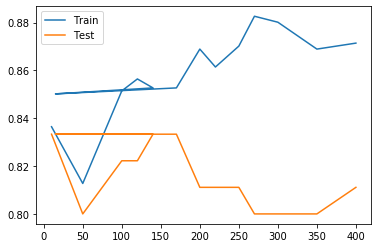

In [142]:
plt.plot(epochs,train_accuracies, label="Train" )
plt.plot(epochs,test_accuracies, label="Test")
plt.legend()

plt.show()

In [119]:
model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
801/801 [==============================] - 0s 210us/step - loss: 0.3081 - accuracy: 0.8714
Epoch 2/200
801/801 [==============================] - 0s 195us/step - loss: 0.3008 - accuracy: 0.8652
Epoch 3/200
801/801 [==============================] - 0s 180us/step - loss: 0.3058 - accuracy: 0.8614
Epoch 4/200
801/801 [==============================] - 0s 185us/step - loss: 0.3043 - accuracy: 0.8689
Epoch 5/200
801/801 [==============================] - 0s 190us/step - loss: 0.2839 - accuracy: 0.8727
Epoch 6/200
801/801 [==============================] - 0s 185us/step - loss: 0.2886 - accuracy: 0.8826
Epoch 7/200
801/801 [==============================] - 0s 190us/step - loss: 0.2946 - accuracy: 0.8714
Epoch 8/200
801/801 [==============================] - 0s 195us/step - loss: 0.2840 - accuracy: 0.8777
Epoch 9/200
801/801 [==============================] - 0s 190us/step - loss: 0.2766 - accuracy: 0.8826
Epoch 10/200
801/801 [==============================] - 0s 190us/step - l

801/801 [==============================] - 0s 190us/step - loss: 0.2629 - accuracy: 0.8851
Epoch 158/200
801/801 [==============================] - 0s 195us/step - loss: 0.2590 - accuracy: 0.8926
Epoch 159/200
801/801 [==============================] - 0s 190us/step - loss: 0.2547 - accuracy: 0.8951
Epoch 160/200
801/801 [==============================] - 0s 195us/step - loss: 0.2617 - accuracy: 0.8876
Epoch 161/200
801/801 [==============================] - 0s 215us/step - loss: 0.2631 - accuracy: 0.8851
Epoch 162/200
801/801 [==============================] - 0s 190us/step - loss: 0.2551 - accuracy: 0.8889
Epoch 163/200
801/801 [==============================] - 0s 180us/step - loss: 0.2513 - accuracy: 0.9001
Epoch 164/200
801/801 [==============================] - 0s 190us/step - loss: 0.2431 - accuracy: 0.8964
Epoch 165/200
801/801 [==============================] - 0s 185us/step - loss: 0.2507 - accuracy: 0.8926
Epoch 166/200
801/801 [==============================] - 0s 190us/ste

In [120]:
#Load test data
test_data = pd.read_csv("test.csv", header=0)

In [121]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [123]:
#label encode Categorical features
#Sex
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
test_data['Sex'] =  label_encoder.fit_transform(test_data['Sex'])

In [124]:
imputer = SimpleImputer(strategy='most_frequent')
test_data['Embarked'] = imputer.fit_transform(X=test_data[['Embarked']])

In [125]:
#Hot encode Categorical features
#Embarked, since we have 3 values, label Encoding should work fine, but let's go with Hot encode to be safe
test_data = pd.concat([test_data , pd.get_dummies(test_data[['Embarked']])], axis=1)

#Drop Embarked col
test_data.drop(columns=['Embarked'], axis=1, inplace=True)

In [126]:
iter_impute = IterativeImputer(max_iter=10, random_state=0)
iter_impute.fit(test_data.values)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=100, min_value=1,
                 missing_values=np.nan, n_nearest_features=None,
                 random_state=0, sample_posterior=False, tol=0.001,
                 verbose=0)

X_test_data = test_data.values

imputed = np.round(iter_impute.transform(X_test_data))

In [128]:
test_data = pd.DataFrame(imputed, columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S'])

In [129]:
test_data[test_data['Age'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S


In [130]:
test_data[test_data['Age'] < 0]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S


In [131]:
#Feature engineering
#1. Add a new feature that contains the total number of SibSp+Parch
test_data['Total_Family'] = test_data.SibSp + test_data.Parch

#Drop SibSp and Parch features
test_data = test_data.drop(columns=['SibSp','Parch'], axis=1)

In [132]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Total_Family
0,3.0,1.0,34.0,8.0,0.0,1.0,0.0,0.0
1,3.0,0.0,47.0,7.0,0.0,0.0,1.0,1.0
2,2.0,1.0,62.0,10.0,0.0,1.0,0.0,0.0
3,3.0,1.0,27.0,9.0,0.0,0.0,1.0,0.0
4,3.0,0.0,22.0,12.0,0.0,0.0,1.0,2.0


In [133]:
y_pred = model.predict_classes(test_data,verbose=1)
df_pred = pd.DataFrame(y_pred, columns=['Survived'])

418/418 [==============================] - 0s 57us/step


y_pred = model.predict(test_data)
df_pred = pd.DataFrame(y_pred, columns=['y_pred'])
df_pred['Survived'] =  np.where(y_pred >= 0.5, 1, 0)
df_pred

In [134]:
df_pred.to_csv('Titanic_Predictions_Deep.csv',sep=',' , line_terminator='\n')